# MATSim Output Example Analysis

### Objective of this exercise 

The aim of this exercise class is to demonstrate how MATSim results can be read and analyzed. Using Python or any other scripting language such as R to do your analysis provides one with flexibility and the ability to do much more than what you can find in the MATSim analysed outputs or even interactive programs such as VIA. 

We will cover the following analysis
- Reading and viewing output files
- Descriptive analysis of socio-demographic attributes
- Creating tables based on interest (example: Modal split)
- Merging output files (Modal split per vehicle availability)
- Distance analysis
    - Average vkt with bar plot
    - distance distribution per mode (e.g car)
- Time related analysis (example: time of day of PT trips)
- Things to note for good analysis
    - Comparing apples with apples (e.g stuck agents)
    - Right plot for better communication
    - Saving figures with good resolutions

### What you need for this to work

Notebook setup
- First, it is expected that you have Jupyter notebook or Anaconda installed Jupyter notebook or Jupyter lab on your computer to be able to view this file or interact with this file.
- Make sure that the required packages are installed. These include: Pandas, Numpy and Matplotlib. You can check when you try to run the imports.

MATSim output files
- persons.csv
- trips.csv
- legs.csv


In [1]:
# importing packages we may need
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import datetime as dt

### Reading and viewing output files

For reading and manipulating our output files we are going to work mostly with the pandas package. Pandas allows us to explore, clean, and process tabular data which in pandas-speak is called a DataFrame. With pandas one can read and write data from/to any of the following formats, csv, excel, txt and more 

In [2]:
# Let's read in our output files which are in csv format - DON'T FORGET to add your own path
path = "C:/Users/kaghog/git/abmt2021/scenarios/zurich/simulation_output_eqasim"

# the default reading is comma separated, so you want to pay attention to how your data is separated, in our case it is semi-colon
# matsim output can come in compressed form (gzip), in such case like we do here we use the zip option for pandas to decompress the file
# you may also want to specify the unicode format in some cases where data contains symbols that is not recognizable by utf-8, now we don't

df_persons = pd.read_csv("%s/output_persons.csv.gz"%path, sep=";", compression = "gzip")
df_trips = pd.read_csv("%s/output_trips.csv.gz"%path, sep=";", compression = "gzip")
df_legs = pd.read_csv("%s/output_legs.csv.gz"%path, sep=";", compression = "gzip")

In [3]:
# Let's explore our files a bit
df_persons.head()

,person,executed_score,first_act_x,first_act_y,first_act_type,ptHasGA,statpopPersonId,sex,bikeAvailability,ptHasVerbund,...,mzHeadId,mzPersonId,ptHasHalbtax,age,home_y,carAvail,home_x,isCarPassenger,isOutside,spRegion
0,201740002877065,-0.290556,2.688945e+06,1.256495e+06,outside,False,201740002877065,f,FOR_SOME,False,...,240745,215018,False,32,1257688.0,sometimes,2688734.0,False,True,1
1,201740002877503,-0.959167,2.692847e+06,1.241592e+06,outside,False,201740002877503,m,FOR_SOME,False,...,362124,233039,True,50,1189062.0,always,2754273.0,False,True,3
2,201740002877869,-0.998056,2.693333e+06,1.249592e+06,outside,False,201740002877869,m,FOR_ALL,False,...,453890,413623,False,50,1253611.0,always,2694870.0,False,True,1
3,201740002878036,-1.220556,2.684403e+06,1.239174e+06,home,False,201740002878036,m,FOR_NONE,False,...,124940,235227,True,37,1239174.0,always,2684403.0,False,True,1
4,201740002878430,-3.873056,2.675684e+06,1.241875e+06,home,False,201740002878430,f,FOR_SOME,False,...,205385,148734,True,31,1241875.0,never,2675684.0,False,False,3


In [4]:
#one can check the length of the data and if there any columns with null observation (empty) with using the info() method
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12344 entries, 0 to 12343
Data columns (total 24 columns):
person                12344 non-null int64
executed_score        12344 non-null float64
first_act_x           12344 non-null float64
first_act_y           12344 non-null float64
first_act_type        12344 non-null object
ptHasGA               12344 non-null bool
statpopPersonId       12344 non-null int64
sex                   12344 non-null object
bikeAvailability      12344 non-null object
ptHasVerbund          12344 non-null bool
statpopHouseholdId    12344 non-null int64
employed              12344 non-null bool
ptHasStrecke          12344 non-null bool
hasLicense            12344 non-null object
mzHeadId              12344 non-null int64
mzPersonId            12344 non-null int64
ptHasHalbtax          12344 non-null bool
age                   12344 non-null int64
home_y                11373 non-null float64
carAvail              12344 non-null object
home_x                1

In [5]:
df_trips.head()

,person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,...,start_facility_id,start_link,start_x,start_y,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop
0,201740002877065,1,201740002877065_1,13:17:55,00:01:54,00:00:00,858,634,NaN,car,...,outside_69,663014,2.688945e+06,1.256495e+06,outside_70,744933,2.689401e+06,1.256054e+06,NaN,NaN
1,201740002877065,2,201740002877065_2,13:19:49,00:00:00,00:00:00,758,758,NaN,outside,...,outside_70,744933,2.689401e+06,1.256054e+06,outside_7,685965,2.689981e+06,1.255567e+06,NaN,NaN
2,201740002877065,3,201740002877065_3,13:20:54,00:00:31,00:00:00,345,144,NaN,car,...,outside_7,685965,2.689981e+06,1.255567e+06,outside_8,921743,2.690125e+06,1.255560e+06,NaN,NaN
3,201740002877065,4,201740002877065_4,18:14:34,00:00:03,00:00:00,3218,3218,NaN,outside,...,outside_8,921743,2.690125e+06,1.255560e+06,outside_22,444204,2.692237e+06,1.253132e+06,NaN,NaN
4,201740002877065,5,201740002877065_5,18:33:08,00:14:58,00:00:00,14399,6109,NaN,car,...,outside_22,444204,2.692237e+06,1.253132e+06,outside_71,743567,2.687918e+06,1.257453e+06,NaN,NaN


In [6]:
#here longest_distance_mode column and some others have some empty observations
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46196 entries, 0 to 46195
Data columns (total 23 columns):
person                    46196 non-null int64
trip_number               46196 non-null int64
trip_id                   46196 non-null object
dep_time                  46196 non-null object
trav_time                 46196 non-null object
wait_time                 46196 non-null object
traveled_distance         46196 non-null int64
euclidean_distance        46196 non-null int64
main_mode                 0 non-null float64
longest_distance_mode     42865 non-null object
modes                     46196 non-null object
start_activity_type       46196 non-null object
end_activity_type         46196 non-null object
start_facility_id         46196 non-null object
start_link                46196 non-null int64
start_x                   46196 non-null float64
start_y                   46196 non-null float64
end_facility_id           46196 non-null object
end_link                  46196 n

In [7]:
df_trips[df_trips["longest_distance_mode"].isna()]

,person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,...,start_facility_id,start_link,start_x,start_y,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop
49,201740002883262,1,201740002883262_1,06:51:58,00:00:00,00:00:00,0,0,NaN,NaN,...,home201701603376526,582537,2.689006e+06,1.243485e+06,home201701603376526,582537,2.689006e+06,1.243485e+06,NaN,NaN
51,201740002883416,2,201740002883416_2,10:30:03,00:00:00,00:00:00,0,0,NaN,NaN,...,outside_107,586840,2.672007e+06,1.251006e+06,outside_165,586839,2.672007e+06,1.251006e+06,NaN,NaN
54,201740002883416,5,201740002883416_5,10:43:13,00:00:01,00:00:00,0,0,NaN,NaN,...,outside_190,31351,2.671214e+06,1.247332e+06,outside_190,31351,2.671214e+06,1.247332e+06,NaN,NaN
55,201740002883416,6,201740002883416_6,11:15:03,00:00:00,00:00:00,0,0,NaN,NaN,...,outside_190,31351,2.671214e+06,1.247332e+06,outside_190,31351,2.671214e+06,1.247332e+06,NaN,NaN
59,201740002883836,1,201740002883836_1,14:48:56,00:00:00,00:00:00,0,0,NaN,NaN,...,home201701933733657,269136,2.690950e+06,1.247019e+06,home201701933733657,269136,2.690950e+06,1.247019e+06,NaN,NaN
61,201740002885186,2,201740002885186_2,15:26:20,00:00:00,00:00:00,0,0,NaN,NaN,...,outside_51,1001547,2.684894e+06,1.256094e+06,outside_51,1001547,2.684894e+06,1.256094e+06,NaN,NaN
64,201740002885604,2,201740002885604_2,12:07:41,00:00:00,00:00:00,0,150,NaN,NaN,...,353043,846325,2.681606e+06,1.243781e+06,572632,846325,2.681756e+06,1.243786e+06,NaN,NaN
65,201740002885604,3,201740002885604_3,13:02:41,00:00:00,00:00:00,0,150,NaN,NaN,...,572632,846325,2.681756e+06,1.243786e+06,599847,846325,2.681606e+06,1.243781e+06,NaN,NaN
72,201740002886288,6,201740002886288_6,18:25:01,00:00:00,00:00:00,0,0,NaN,NaN,...,home201700841977844,1068819,2.675381e+06,1.254529e+06,home201700841977844,1068819,2.675381e+06,1.254529e+06,NaN,NaN
88,201740002891561,2,201740002891561_2,13:53:12,00:00:00,00:00:00,0,0,NaN,NaN,...,outside_109,1051610,2.676372e+06,1.258110e+06,outside_66,1051609,2.676372e+06,1.258110e+06,NaN,NaN


In [8]:
df_legs.head()

,person,trip_id,dep_time,trav_time,wait_time,distance,mode,start_link,start_x,start_y,end_link,end_x,end_y,access_stop_id,egress_stop_id,transit_line,transit_route
0,201740002877065,201740002877065_1,13:17:55,00:01:54,00:00:00,857,car,663014,2.688945e+06,1.256495e+06,744933,2.689401e+06,1.256054e+06,NaN,NaN,NaN,NaN
1,201740002877065,201740002877065_2,13:19:49,00:00:00,00:00:00,758,outside,744933,2.689401e+06,1.256054e+06,685965,2.689981e+06,1.255567e+06,NaN,NaN,NaN,NaN
2,201740002877065,201740002877065_3,13:20:54,00:00:31,00:00:00,344,car,685965,2.689981e+06,1.255567e+06,921743,2.690125e+06,1.255560e+06,NaN,NaN,NaN,NaN
3,201740002877065,201740002877065_4,18:14:34,00:00:03,00:00:00,3218,outside,921743,2.690125e+06,1.255560e+06,444204,2.692237e+06,1.253132e+06,NaN,NaN,NaN,NaN
4,201740002877065,201740002877065_5,18:33:08,00:14:58,00:00:00,14399,car,444204,2.692237e+06,1.253132e+06,743567,2.687918e+06,1.257453e+06,NaN,NaN,NaN,NaN


In [9]:
df_legs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91290 entries, 0 to 91289
Data columns (total 17 columns):
person            91290 non-null int64
trip_id           91290 non-null object
dep_time          91290 non-null object
trav_time         91290 non-null object
wait_time         91290 non-null object
distance          91290 non-null int64
mode              91290 non-null object
start_link        91290 non-null object
start_x           91290 non-null float64
start_y           91290 non-null float64
end_link          91290 non-null object
end_x             91290 non-null float64
end_y             91290 non-null float64
access_stop_id    0 non-null float64
egress_stop_id    0 non-null float64
transit_line      0 non-null float64
transit_route     0 non-null float64
dtypes: float64(8), int64(2), object(7)
memory usage: 11.8+ MB


### Descriptive analysis of socio-demographic attributes

We can look at some socio-demographic attributes of the population. The example here is to use aggregate descriptive statistics to know how many people live in households with some car available 

In [10]:
#First let's identify the column of interest
df_persons.columns

Index(['person', 'executed_score', 'first_act_x', 'first_act_y',
       'first_act_type', 'ptHasGA', 'statpopPersonId', 'sex',
       'bikeAvailability', 'ptHasVerbund', 'statpopHouseholdId', 'employed',
       'ptHasStrecke', 'hasLicense', 'mzHeadId', 'mzPersonId', 'ptHasHalbtax',
       'age', 'home_y', 'carAvail', 'home_x', 'isCarPassenger', 'isOutside',
       'spRegion'],
      dtype='object')

In [11]:
#what are the values of the carAvail column?
df_persons["carAvail"].unique()

array(['sometimes', 'always', 'never'], dtype=object)

In [12]:
#the desribe() function can also give you a quick glimpse, although more information is gotten from numerical data type
df_persons["carAvail"].describe()

count      12344
unique         3
top       always
freq        7382
Name: carAvail, dtype: object

In [13]:
#Number of people in the different car availability categories
df_persons["carAvail"].value_counts()

always       7382
never        3339
sometimes    1623
Name: carAvail, dtype: int64

In [14]:
#share of people in the different categories
df_persons["carAvail"].value_counts(normalize = True)

always       0.598023
never        0.270496
sometimes    0.131481
Name: carAvail, dtype: float64

### Creating tables based on interest (example: Modal split)

Here we would use the trips dataframe to get the modal split from our simulation results

In [15]:
df_trips.columns

Index(['person', 'trip_number', 'trip_id', 'dep_time', 'trav_time',
       'wait_time', 'traveled_distance', 'euclidean_distance', 'main_mode',
       'longest_distance_mode', 'modes', 'start_activity_type',
       'end_activity_type', 'start_facility_id', 'start_link', 'start_x',
       'start_y', 'end_facility_id', 'end_link', 'end_x', 'end_y',
       'first_pt_boarding_stop', 'last_pt_egress_stop'],
      dtype='object')

In [16]:
df_trips["modes"].value_counts().reset_index(name="mode_split").rename(columns={"index":"mode"})

,mode,mode_split
0,car,14895
1,walk,10017
2,outside,5312
3,car_passenger,3907
4,walk-pt-walk-pt-walk-pt-walk,3594
5,walk-pt-walk-pt-walk,3147
6,walk-pt-walk,2325
7,bike,2220
8,walk-pt-walk-pt-walk-pt-walk-pt-walk,749
9,walk-pt-walk-pt-walk-pt-walk-pt-walk-pt-walk,30


In [17]:
#We can combine all pt mode
df_trips["modes_summary"] = df_trips["modes"]
f_mode = df_trips["modes"].isin(["car","bike","walk","outside","car_passenger"])

#filter and assign pt to those that are non-pt
df_trips.loc[~f_mode, "modes_summary"] = "pt"

#make the table again with our new column
df_mode = df_trips["modes_summary"].value_counts().reset_index(name="mode_split").rename(columns={"index":"mode"})
df_mode

,mode,mode_split
0,car,14895
1,walk,10017
2,pt,9845
3,outside,5312
4,car_passenger,3907
5,bike,2220


There are many things you can add to this table, like adding the share or even the total or average distance for each mode as a next column

You can then export this table for your use

In [18]:
#Let's add the average share
df_mode = df_mode.merge(round(df_trips["modes_summary"].value_counts(normalize=True).reset_index(name="mode_share").rename(columns={"index":"mode"}),2))
df_mode

,mode,mode_split,mode_share
0,car,14895,0.32
1,walk,10017,0.22
2,pt,9845,0.21
3,outside,5312,0.11
4,car_passenger,3907,0.08
5,bike,2220,0.05


In [19]:
#Let's export the table out
df_mode.to_csv("mode_share.csv", index=False)

### Merging output files (Modal split per vehicle availability)

Here we will combine the persons dataframe and the trips data frame to get information about the modal split depending on how many cars people have in their households

In [20]:
#First let's merge the columns from both dfs (dataframes) we need for this analysis
#Yes you can reduce your df to just the columns you need

df_person_mode = df_persons[["person","carAvail"]].merge(df_trips[["person","modes", "modes_summary"]], on="person")
df_person_mode.head()

,person,carAvail,modes,modes_summary
0,201740002877065,sometimes,car,car
1,201740002877065,sometimes,outside,outside
2,201740002877065,sometimes,car,car
3,201740002877065,sometimes,outside,outside
4,201740002877065,sometimes,car,car


In [21]:
df_person_mode.groupby("carAvail")["modes_summary"].value_counts(normalize = True)

carAvail   modes_summary
always     car              0.443654
           pt               0.185820
           walk             0.167707
           outside          0.127804
           car_passenger    0.052619
           bike             0.022397
never      walk             0.356770
           pt               0.264700
           car_passenger    0.171857
           bike             0.124275
           outside          0.081141
           car              0.001257
sometimes  car              0.278467
           pt               0.257529
           walk             0.218393
           outside          0.110163
           car_passenger    0.091802
           bike             0.043646
Name: modes_summary, dtype: float64

In [22]:
#compare between modes within vehicle availability groups
#Note while the share may be different the absolute counts are the same as above

df_person_mode.groupby(["modes_summary"])["carAvail"].value_counts(normalize = True)

modes_summary  carAvail 
bike           never        0.578829
               always       0.299099
               sometimes    0.122072
car            always       0.883048
               sometimes    0.116079
               never        0.000873
car_passenger  never        0.454825
               always       0.399283
               sometimes    0.145892
outside        always       0.713291
               never        0.157944
               sometimes    0.128765
pt             always       0.559573
               never        0.278009
               sometimes    0.162417
walk           always       0.496356
               never        0.368274
               sometimes    0.135370
Name: carAvail, dtype: float64

### Distance analysis
- Average vkt with bar plot
- distance distribution per mode (e.g car)

Here we make a bar plot of the average vehcile kilometers traveled per mode or trip purpose and also an example histogram to show the distance distribution of one mode
We use df_trips which contains the information we need

In [23]:
df_trips.columns

Index(['person', 'trip_number', 'trip_id', 'dep_time', 'trav_time',
       'wait_time', 'traveled_distance', 'euclidean_distance', 'main_mode',
       'longest_distance_mode', 'modes', 'start_activity_type',
       'end_activity_type', 'start_facility_id', 'start_link', 'start_x',
       'start_y', 'end_facility_id', 'end_link', 'end_x', 'end_y',
       'first_pt_boarding_stop', 'last_pt_egress_stop', 'modes_summary'],
      dtype='object')

In [24]:
#First we convert the distance to km for readability
#convert crowfly distance to km
df_trips["traveled_distance_km"] = 0.001 * np.array(df_trips["traveled_distance"])

In [25]:
#we can look at a descrptive statistics of the distances
df_trips["traveled_distance_km"].describe()

count    46196.000000
mean         5.794228
std          6.653154
min          0.000000
25%          0.577000
50%          3.010000
75%          9.339000
max         41.266000
Name: traveled_distance_km, dtype: float64

In [26]:
df_trips[df_trips["modes_summary"]=="walk"]["traveled_distance_km"].describe()

count    10017.000000
mean         0.592509
std          0.839853
min          0.000000
25%          0.177000
50%          0.401000
75%          0.763000
max         19.851000
Name: traveled_distance_km, dtype: float64

In [27]:
#average km travelled per mode
df_trips.groupby(["modes_summary"])["traveled_distance_km"].mean()

modes_summary
bike             2.076999
car              8.262870
car_passenger    8.837568
outside          1.577860
pt               9.257355
walk             0.592509
Name: traveled_distance_km, dtype: float64

In [28]:
#average km travelled per mode
df_trips.groupby(["end_activity_type"])["traveled_distance_km"].mean()

end_activity_type
education    2.832189
home         4.621026
leisure      4.299857
other        4.738949
outside      7.376578
shop         3.820385
work         7.353178
Name: traveled_distance_km, dtype: float64

In [29]:
df_mode_dist = df_trips.groupby(["modes_summary"])["traveled_distance_km"].mean().reset_index(name="avg_dist_km")
df_mode_dist

,modes_summary,avg_dist_km
0,bike,2.076999
1,car,8.262870
2,car_passenger,8.837568
3,outside,1.577860
4,pt,9.257355
5,walk,0.592509


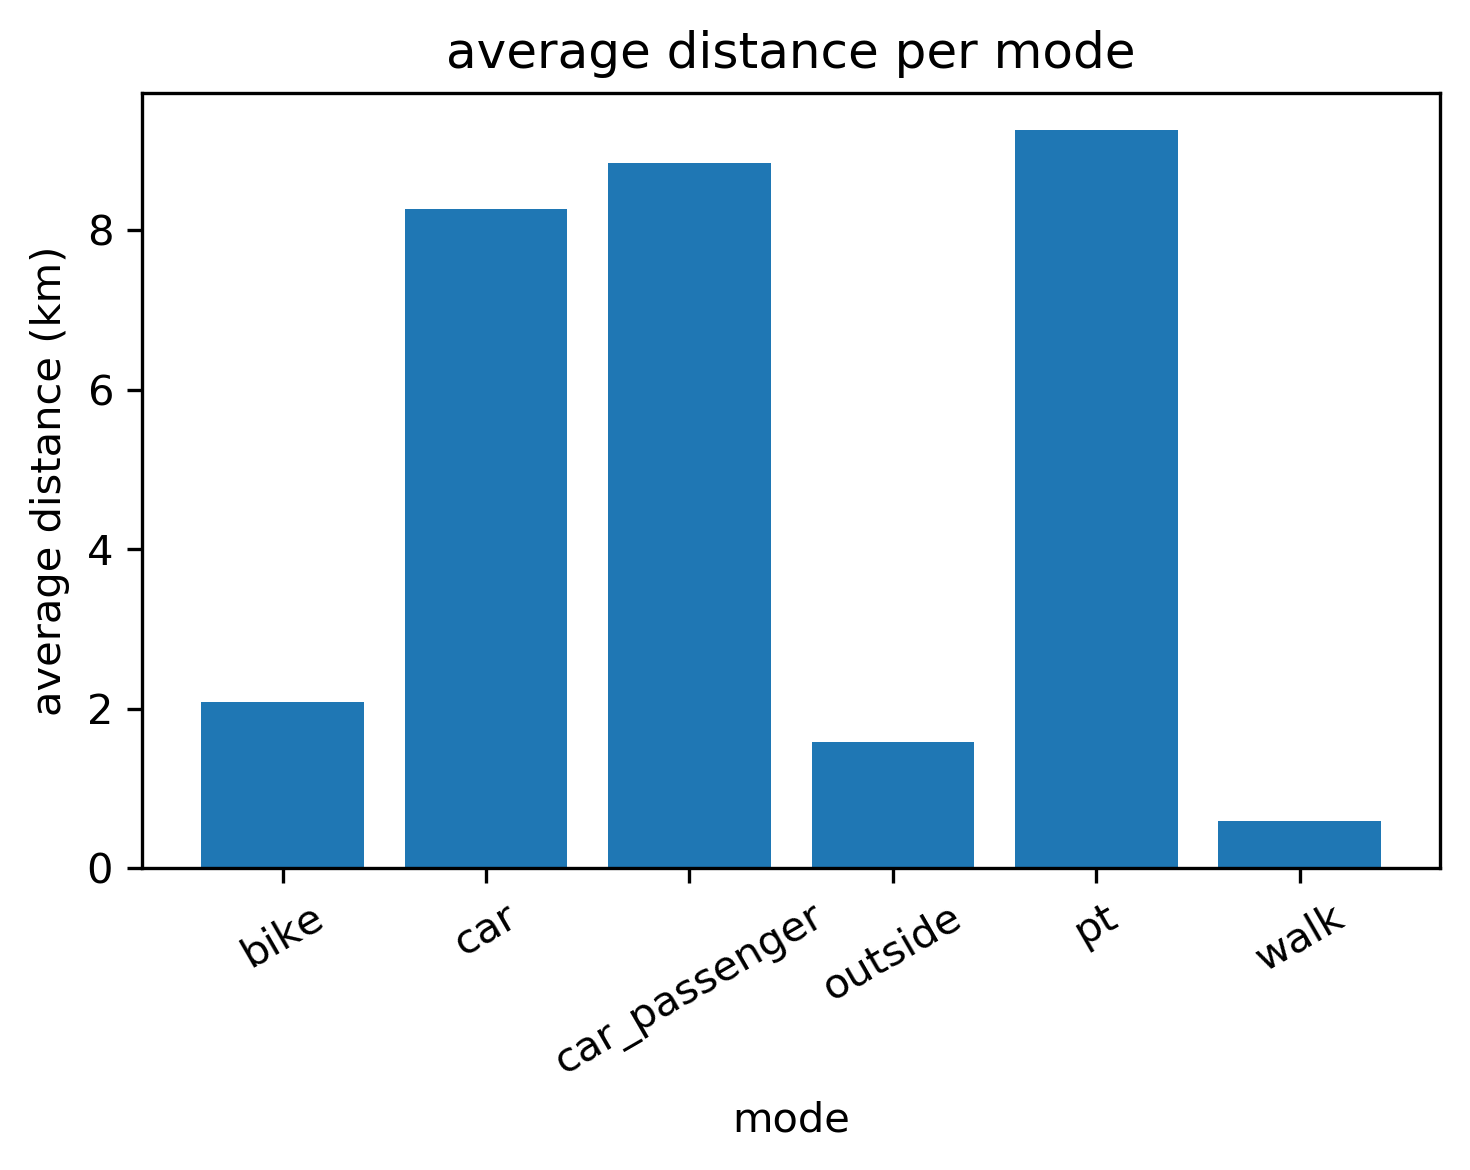

In [30]:
#Now to plot one of these

#prepare data we need

modelist = df_mode_dist["modes_summary"].values
ind = np.arange(len(modelist))
avg_dist = df_mode_dist["avg_dist_km"]

#specify plot parameters
plt.rcParams['axes.facecolor'] = "#FFFFFF"
plt.rcParams['figure.figsize'] = [5,4]
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots()
ax.bar(modelist, avg_dist)#, width = 0.25)

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel("average distance (km)")
ax.set_title("average distance per mode")
ax.set_xlabel("mode")
plt.xticks(rotation=30)
fig.tight_layout()
#plt.savefig("mybarplot.png")

Matplotlib offers various ways to make your plot better, maybe you want to change the color, adjust the width, plot parameters, customize the label, compare same thing for different data. One can find lots of examples from matplotlib.org

Next, maybe we want to look at the distance distribution for a particular mode or for all modes. In this case we look at the distance distribution for the car mode. we would use a histogram to do so

Text(0.5, 0, 'traveled distance (km)')

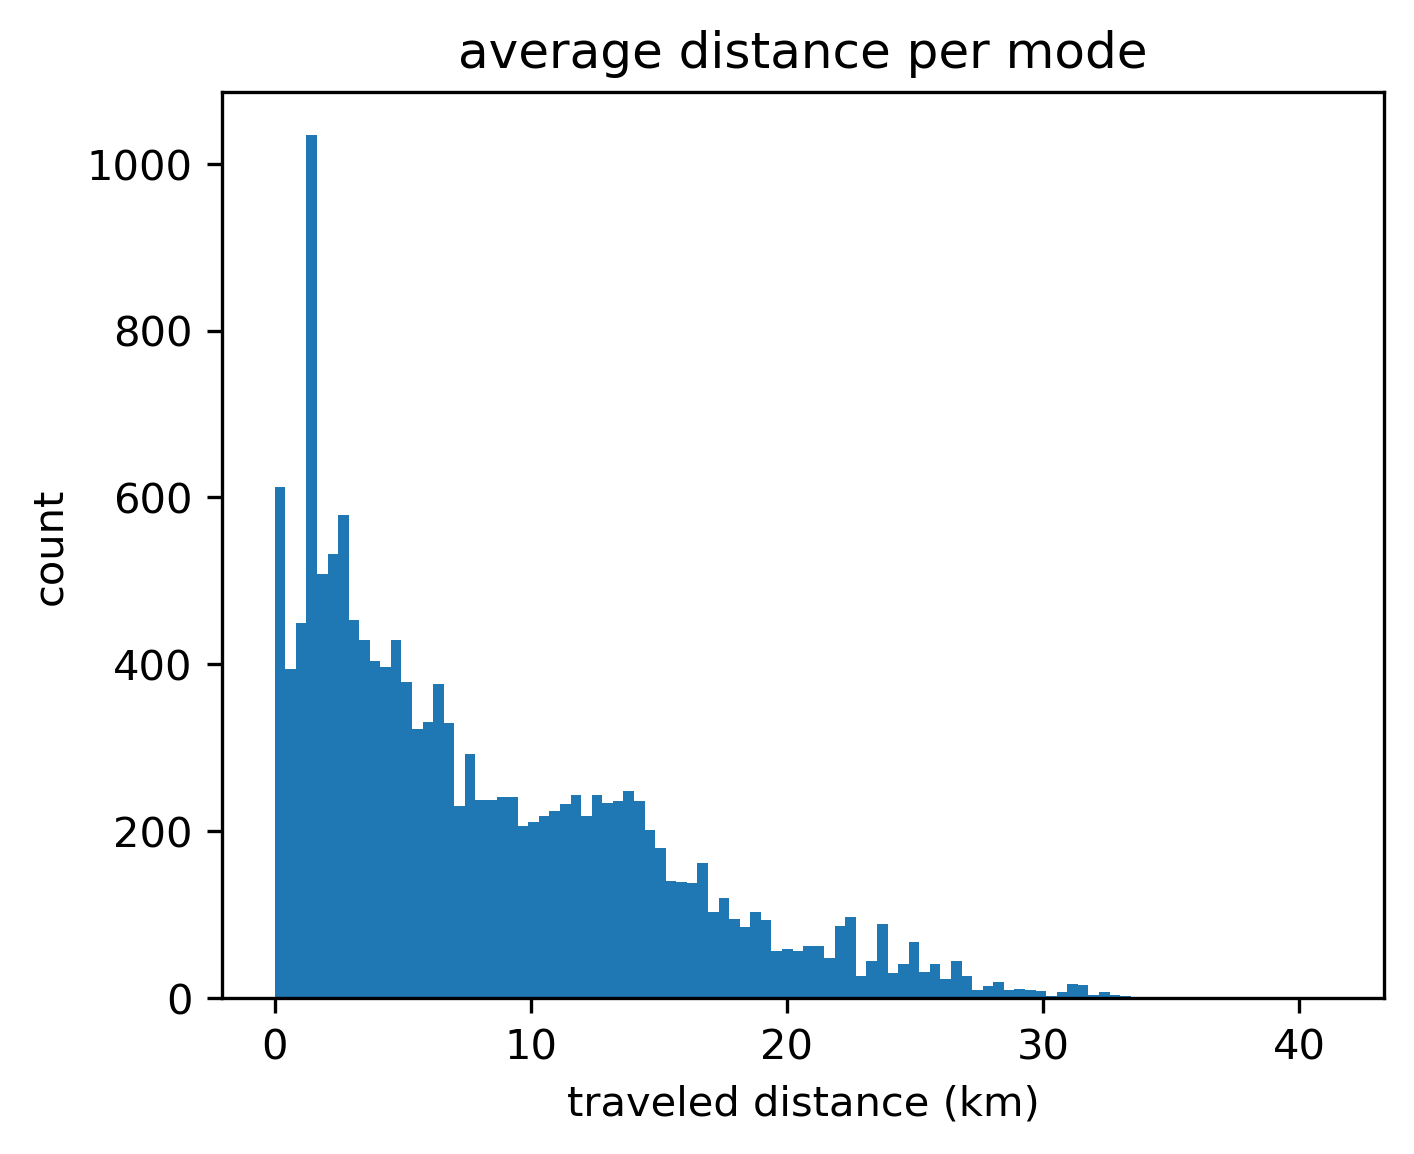

In [31]:
fig, ax = plt.subplots()

ax.hist(df_trips[df_trips["modes_summary"]=="car"]["traveled_distance_km"], bins=100, label="car")
#ax.hist(df_trips[df_trips["modes_summary"]=="pt"]["traveled_distance_km"], bins=100, label="pt")
ax.set_ylabel("count")
ax.set_title("average distance per mode")
ax.set_xlabel("traveled distance (km)")
#plt.legend()

### Time related analysis (example: time of day of PT trips)

Time is reported in the matsim output trips in the hh:mm:ss format and to work with this variable we can process it to whatever form we want depending on our choice of analysis. Here we would convert it to an appropriate data type as it is currently a string. we would use the leg dataframe to look at the trip time of all the pt boardings

In [32]:
#let's look at the legs df and see what information we can extract concerning pt trip times
df_legs.head(10)

,person,trip_id,dep_time,trav_time,wait_time,distance,mode,start_link,start_x,start_y,end_link,end_x,end_y,access_stop_id,egress_stop_id,transit_line,transit_route
0,201740002877065,201740002877065_1,13:17:55,00:01:54,00:00:00,857,car,663014,2.688945e+06,1.256495e+06,744933,2.689401e+06,1.256054e+06,NaN,NaN,NaN,NaN
1,201740002877065,201740002877065_2,13:19:49,00:00:00,00:00:00,758,outside,744933,2.689401e+06,1.256054e+06,685965,2.689981e+06,1.255567e+06,NaN,NaN,NaN,NaN
2,201740002877065,201740002877065_3,13:20:54,00:00:31,00:00:00,344,car,685965,2.689981e+06,1.255567e+06,921743,2.690125e+06,1.255560e+06,NaN,NaN,NaN,NaN
3,201740002877065,201740002877065_4,18:14:34,00:00:03,00:00:00,3218,outside,921743,2.690125e+06,1.255560e+06,444204,2.692237e+06,1.253132e+06,NaN,NaN,NaN,NaN
4,201740002877065,201740002877065_5,18:33:08,00:14:58,00:00:00,14399,car,444204,2.692237e+06,1.253132e+06,743567,2.687918e+06,1.257453e+06,NaN,NaN,NaN,NaN
5,201740002877503,201740002877503_1,07:32:48,00:21:15,00:00:00,13127,car,208359,2.692847e+06,1.241592e+06,574583,2.683254e+06,1.247386e+06,NaN,NaN,NaN,NaN
6,201740002877503,201740002877503_2,11:40:05,00:07:38,00:00:00,3328,car,574583,2.683254e+06,1.247386e+06,655854,2.680806e+06,1.248723e+06,NaN,NaN,NaN,NaN
7,201740002877503,201740002877503_3,11:55:05,00:09:30,00:00:00,4862,car,655854,2.680806e+06,1.248723e+06,92855,2.680676e+06,1.246135e+06,NaN,NaN,NaN,NaN
8,201740002877503,201740002877503_4,12:45:05,00:08:05,00:00:00,3180,car,92855,2.680676e+06,1.246135e+06,574583,2.683254e+06,1.247386e+06,NaN,NaN,NaN,NaN
9,201740002877503,201740002877503_5,16:10:05,00:11:05,00:00:00,12155,car,574583,2.683254e+06,1.247386e+06,222013,2.684668e+06,1.237608e+06,NaN,NaN,NaN,NaN


In [33]:
df_legs[df_legs["mode"]== "pt"].head(20)

,person,trip_id,dep_time,trav_time,wait_time,distance,mode,start_link,start_x,start_y,end_link,end_x,end_y,access_stop_id,egress_stop_id,transit_line,transit_route
27,201740002878430,201740002878430_1,05:42:32,00:30:28,00:00:00,3720,pt,466348,2.675650e+06,1.241900e+06,1076412,2.677850e+06,1.242225e+06,NaN,NaN,NaN,NaN
29,201740002878430,201740002878430_1,06:13:52,00:32:08,00:00:00,24148,pt,567603,2.677826e+06,1.242179e+06,553205,2.683432e+06,1.251778e+06,NaN,NaN,NaN,NaN
31,201740002878430,201740002878430_1,06:46:01,00:12:59,00:00:00,7627,pt,47288,2.683432e+06,1.251778e+06,913642,2.677958e+06,1.254487e+06,NaN,NaN,NaN,NaN
33,201740002878430,201740002878430_1,07:00:42,00:03:18,00:00:00,1303,pt,608549,2.678035e+06,1.254548e+06,392035,2.677192e+06,1.255368e+06,NaN,NaN,NaN,NaN
36,201740002878430,201740002878430_2,17:05:16,00:19:44,00:00:00,973,pt,392036,2.677192e+06,1.255368e+06,608552,2.677841e+06,1.254639e+06,NaN,NaN,NaN,NaN
38,201740002878430,201740002878430_2,17:28:23,00:10:37,00:00:00,7923,pt,913643,2.677958e+06,1.254487e+06,47289,2.683432e+06,1.251778e+06,NaN,NaN,NaN,NaN
40,201740002878430,201740002878430_2,17:39:01,00:32:59,00:00:00,4944,pt,47289,2.683432e+06,1.251778e+06,512120,2.681434e+06,1.248821e+06,NaN,NaN,NaN,NaN
42,201740002878430,201740002878430_2,18:12:01,00:47:59,00:00:00,16034,pt,100955,2.681434e+06,1.248821e+06,567604,2.677826e+06,1.242179e+06,NaN,NaN,NaN,NaN
44,201740002878430,201740002878430_2,19:00:52,00:22:08,00:00:00,3690,pt,7174,2.677850e+06,1.242225e+06,466348,2.675650e+06,1.241900e+06,NaN,NaN,NaN,NaN
48,201740002879166,201740002879166_1,13:29:17,00:08:43,00:00:00,3755,pt,498725,2.685483e+06,1.243557e+06,180185,2.683831e+06,1.246789e+06,NaN,NaN,NaN,NaN


We can see the different pt legs and our column of interest is the dep_time. So we would use one of the datetime methods available in pandas to convert this column to a suitable type for our analysis

In [34]:
#we can check what type of data dep_time is and we wil find that it is current a string type (Object)
df_legs["dep_time"].dtype

dtype('O')

In [35]:
#To note, the reported simualtion time counts for more than 24 hours as there are trips that happen up to the next day in our simulation
pd.to_datetime(df_legs["dep_time"], format = '%H:%M:%S').dtype

#For this to work is to add errors="coerce"
#pd.to_datetime(df_legs["dep_time"], format = '%H:%M:%S', errors= "coerce")

ValueError: time data '24:21:22' does not match format '%H:%M:%S' (match)

In [36]:
#Another way is to use pd.time_delta which then automatically converts to 24 hours
pd.to_timedelta(df_legs["dep_time"])


0       13:17:55
1       13:19:49
2       13:20:54
3       18:14:34
4       18:33:08
5       07:32:48
6       11:40:05
7       11:55:05
8       12:45:05
9       16:10:05
10      07:26:27
11      12:17:54
12      13:02:54
13      14:47:54
14      16:17:54
15      16:52:01
16      08:58:37
17      11:28:37
18      14:28:37
19      15:47:40
20      16:58:37
21      18:01:37
22      18:44:22
23      18:45:19
24      18:45:47
25      19:00:40
26      05:41:46
27      05:42:32
28      06:13:00
29      06:13:52
          ...   
91260   18:41:38
91261   18:47:00
91262   18:47:22
91263   19:03:00
91264   21:09:22
91265   21:17:11
91266   21:26:00
91267   21:26:01
91268   21:36:00
91269   21:36:01
91270   21:42:00
91271   21:43:09
91272   06:25:00
91273   06:25:25
91274   07:08:00
91275   17:47:45
91276   07:34:00
91277   07:34:59
91278   07:38:01
91279   07:42:51
91280   07:44:00
91281   12:00:33
91282   13:00:33
91283   18:30:33
91284   07:49:04
91285   10:19:04
91286   10:32:43
91287   11:49:

In [37]:
pd.to_timedelta(df_legs["dep_time"]).dt.components['hours'].unique()

array([13, 18,  7, 11, 12, 16, 14,  8, 15, 19,  5,  6, 17, 10,  9, 20, 22,
        4, 21,  0, 23,  1,  3,  2], dtype=int64)

But one can use the string split function (e.g df_legs["dep_time"].str.split) to keep it the way it is an extract the time detail

Here we maintain 24 hours and use that for our analysis

In [38]:
#let's look at pt trips
pid_pt = df_legs[df_legs["mode"]== "pt"]["person"].unique()
df_legs_pt = df_legs[df_legs["person"].isin(pid_pt)]
df_legs_pt.head(20)

,person,trip_id,dep_time,trav_time,wait_time,distance,mode,start_link,start_x,start_y,end_link,end_x,end_y,access_stop_id,egress_stop_id,transit_line,transit_route
26,201740002878430,201740002878430_1,05:41:46,00:00:46,00:00:00,54,walk,466348,2.675684e+06,1.241875e+06,466348,2.675650e+06,1.241900e+06,NaN,NaN,NaN,NaN
27,201740002878430,201740002878430_1,05:42:32,00:30:28,00:00:00,3720,pt,466348,2.675650e+06,1.241900e+06,1076412,2.677850e+06,1.242225e+06,NaN,NaN,NaN,NaN
28,201740002878430,201740002878430_1,06:13:00,00:00:52,00:00:00,68,walk,1076412,2.677850e+06,1.242225e+06,567603,2.677826e+06,1.242179e+06,NaN,NaN,NaN,NaN
29,201740002878430,201740002878430_1,06:13:52,00:32:08,00:00:00,24148,pt,567603,2.677826e+06,1.242179e+06,553205,2.683432e+06,1.251778e+06,NaN,NaN,NaN,NaN
30,201740002878430,201740002878430_1,06:46:00,00:00:01,00:00:00,0,walk,553205,2.683432e+06,1.251778e+06,47288,2.683432e+06,1.251778e+06,NaN,NaN,NaN,NaN
31,201740002878430,201740002878430_1,06:46:01,00:12:59,00:00:00,7627,pt,47288,2.683432e+06,1.251778e+06,913642,2.677958e+06,1.254487e+06,NaN,NaN,NaN,NaN
32,201740002878430,201740002878430_1,06:59:00,00:01:42,00:00:00,129,walk,913642,2.677958e+06,1.254487e+06,608549,2.678035e+06,1.254548e+06,NaN,NaN,NaN,NaN
33,201740002878430,201740002878430_1,07:00:42,00:03:18,00:00:00,1303,pt,608549,2.678035e+06,1.254548e+06,392035,2.677192e+06,1.255368e+06,NaN,NaN,NaN,NaN
34,201740002878430,201740002878430_1,07:04:00,00:03:30,00:00:00,251,walk,392035,2.677192e+06,1.255368e+06,933005,2.677042e+06,1.255490e+06,NaN,NaN,NaN,NaN
35,201740002878430,201740002878430_2,17:01:46,00:03:30,00:00:00,251,walk,933005,2.677042e+06,1.255490e+06,392036,2.677192e+06,1.255368e+06,NaN,NaN,NaN,NaN


In [39]:
#Extract the data we need and convert to date time
df_legs_pt = df_legs_pt[df_legs_pt["mode"]== "pt"].copy()
df_legs_pt["dep_time"] = pd.to_timedelta(df_legs_pt["dep_time"])
df_legs_pt["dep_time"].dtype

dtype('<m8[ns]')

In [40]:
#To create hourly time bins for our plot
df_legs_pt["dep_time_hr"] = df_legs_pt["dep_time"].dt.components['hours']

In [41]:
#prepare data for plotting (A groupby method can be used here too)
hourly_count_pt = df_legs_pt["dep_time_hr"].value_counts().reset_index(name="count").rename(columns={"index":'time'})

hourly_count_pt

,time,count
0,17,2713
1,7,2553
2,18,1909
3,8,1843
4,16,1708
5,6,1408
6,12,1252
7,9,1182
8,19,1114
9,13,1101


we can see that not all times are cognize as PT may not operate at such ours or no trips happened
What we can do is create a dataframe of the 24 hour time and merge this to `hourly_count_pt` ensuring to fill NAN with 0
Then we sort the values

In [42]:
hourly_count_pt = hourly_count_pt.merge(pd.DataFrame(list(range(24)), columns=["time"]), on="time", how="right").fillna(0).sort_values("time")
hourly_count_pt

,time,count
19,0,38.0
22,1,0.0
23,2,0.0
21,3,1.0
20,4,17.0
16,5,333.0
5,6,1408.0
1,7,2553.0
3,8,1843.0
7,9,1182.0


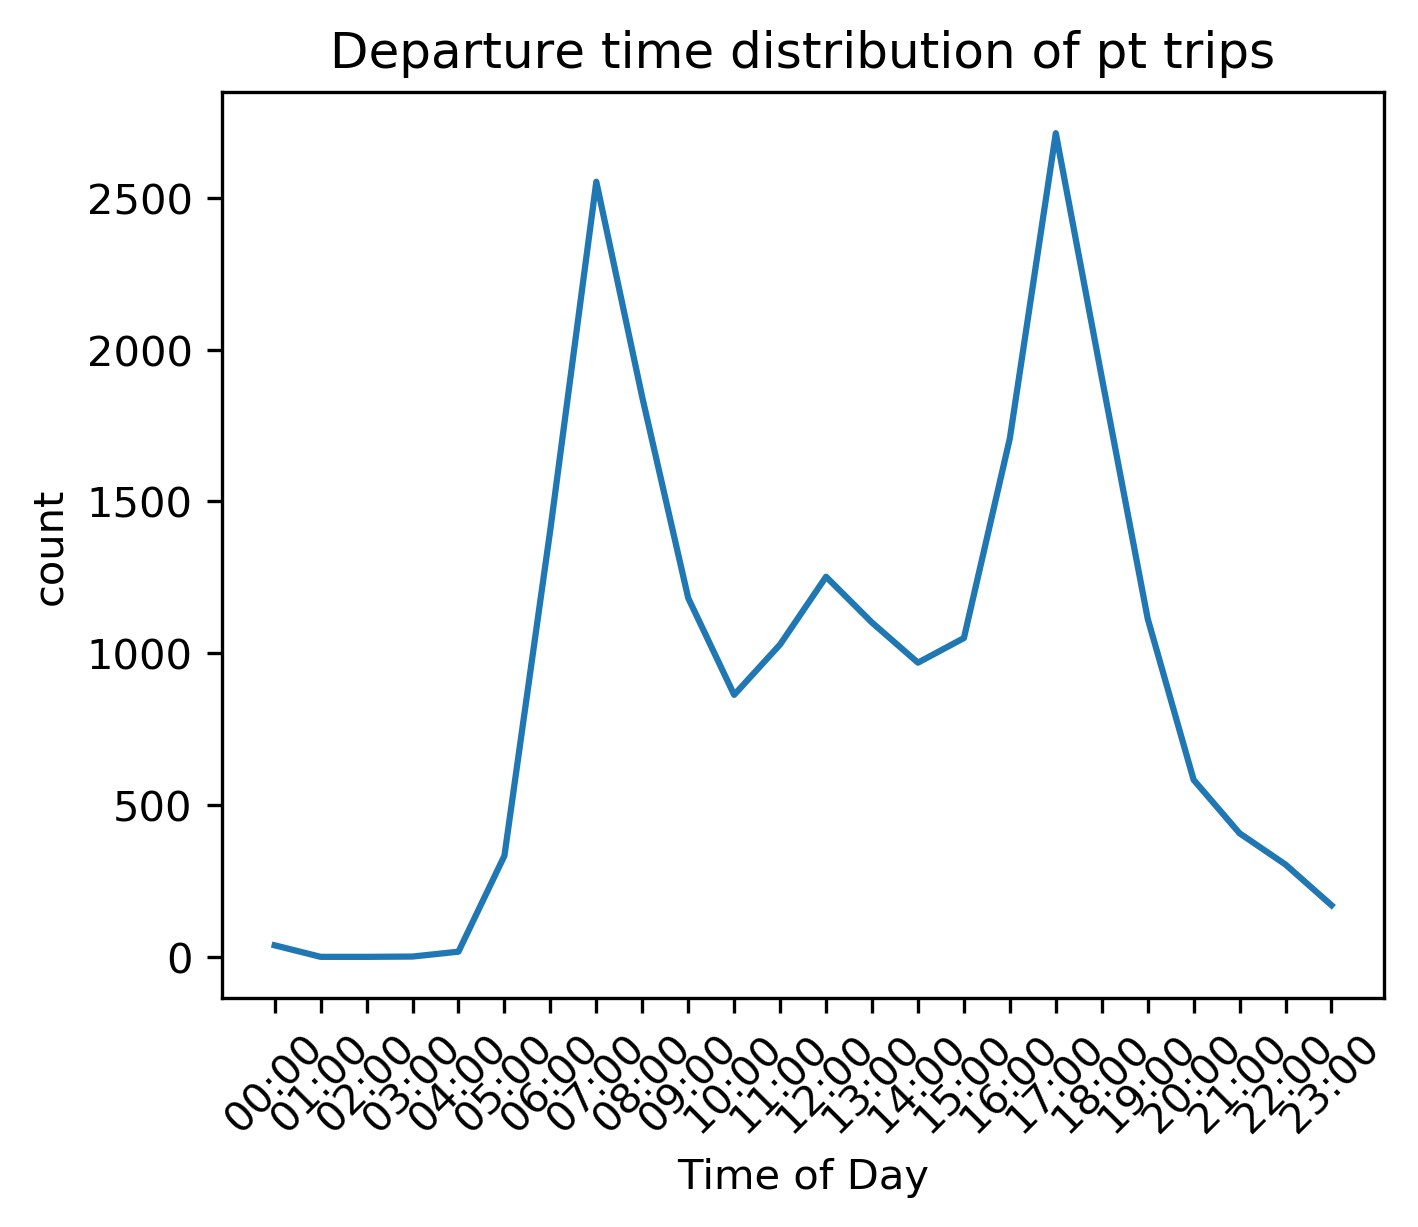

In [43]:
ind = hourly_count_pt["time"]
time_label = ['00:00','01:00','02:00','03:00','04:00', '05:00','06:00','07:00','08:00', '09:00', '10:00', '11:00', '12:00', '13:00','14:00', '15:00','16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

fig, ax = plt.subplots()

ax.plot(ind, hourly_count_pt['count'])

ax.set_xticks(ticks=ind)
ax.set_xticklabels(time_label, rotation=45) 

ax.set_title("Departure time distribution of pt trips")


#ax.set_xticklabels(ind)
ax.set(xlabel = 'Time of Day', ylabel= "count")

plt.show()

### Things to note for good analysis
- Right plot for better communication
- Saving figures with good resolutions
- Comparing apples with apples (e.g stuck agents)

From the above analysis so far we have seen how to produce different plots from our MATSim output results. What kind of plots were good for visualizing what kind of information. we also saw how we can increase the resolution (`plt.rcParams['figure.dpi'] = 300`) of our plots and save our plots (`plt.savefig("mybarplot.png")`) in a clear nice way

#### Comparing right
Now we look at the importance of comparing correctly. Most of the time we would be making more comparisons in our analysis than the exploratory examples shown above. We may be comparing a base scenario to, for example, a taxi scenario or across different taxi fleet sizes 
There could situations where agents were stuck because 
- they could not find a taxi, w
- were rejected by the taxi or 
- their trips were not completed possibly because the simulation end time is shorter than the taxi operating time is longer

how to then explore your data before comparing is to check for any null values in variables of importance and remove agents affected

check for weird string types such as (contains('�'))

